# Assignment 3
The objective of this assignment is to get you familiarize with `AutoEncoders`.

## Instructions
- Run this notebook on ```Google Colab(preferable)```
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells. 

## Note
- Code snippets are in ``Pytorch``. If you are comfortable with ``Keras`` feel free to use it. No restrictions on the frameworks

## Datasets 
- CIFAR10

## Packages Used
- Pytorch 
- Refer this link to get familiarity with pytorch and CIFAR10 dataset[link](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment3_Q2.ipynb`.

## Question 2 : Autoencoders


In [86]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### Load CIFAR 10 Dataset

In [87]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=16,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print("Train Data shape:", trainset.data.shape)
print("Test Data shape:", testset.data.shape)

Files already downloaded and verified
Files already downloaded and verified
Train Data shape: (50000, 32, 32, 3)
Test Data shape: (10000, 32, 32, 3)


### Visualize the Data

torch.Size([16, 3, 32, 32])
torch.Size([16])


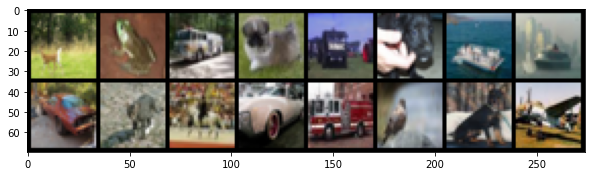

In [88]:
def imshow(img):
    img = img #/ 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

# show images
imshow(torchvision.utils.make_grid(images))

### Define Model
Refer ``` torch.nn ``` [link](https://pytorch.org/docs/stable/nn.html) 

Experiment with different architectures of encoder and decoder i.e
- encoder and decoder is fully connected layers
- encoder and decoder is combination of convolution layers + fully connected layers
- encoder and decoder is fully convolutional layers.

### **Autoencoders**: Fully Connected Layers

In [89]:
class Autoencoder_FCFC(nn.Module):
    def __init__(self):
        super(Autoencoder_FCFC, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(
            # Write your code here
            nn.Flatten(),
            nn.Linear(32*32*3, 32*32),
            nn.ReLU(),
            nn.Linear(32*32, 300),
            nn.ReLU(),
            nn.Linear(300, 100),
        )
        self.decoder = nn.Sequential(
            # Write your code here
            nn.Linear(100, 300),
            nn.ReLU(),
            nn.Linear(300, 32*32),
            nn.ReLU(),
            nn.Linear(32*32, 32*32*3),
            nn.Sigmoid(),
            nn.Unflatten(1, (3,32,32)),
        
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


In [90]:
def print_model(encoder, decoder):
    print("############## Encoder ##############")
    print(encoder)
    print("############## Decoder ##############")
    print(decoder)
    print("")

def create_model_FCFC():
  autoencoder = Autoencoder_FCFC().cuda()
  print_model(autoencoder.encoder, autoencoder.decoder)
  return autoencoder

### Loss and Optimizer

In [91]:
autoencoder = create_model_FCFC()
# autoencoder = autoencoder.to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters())

############## Encoder ##############
Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=3072, out_features=1024, bias=True)
  (2): ReLU()
  (3): Linear(in_features=1024, out_features=300, bias=True)
  (4): ReLU()
  (5): Linear(in_features=300, out_features=100, bias=True)
)
############## Decoder ##############
Sequential(
  (0): Linear(in_features=100, out_features=300, bias=True)
  (1): ReLU()
  (2): Linear(in_features=300, out_features=1024, bias=True)
  (3): ReLU()
  (4): Linear(in_features=1024, out_features=3072, bias=True)
  (5): Sigmoid()
  (6): Unflatten(dim=1, unflattened_size=(3, 32, 32))
)



### Training

In [92]:
for epoch in range(10):
	running_loss = 0.0
	for i, (inputs, _) in enumerate(trainloader, 0):
			inputs = Variable(inputs).data.cuda()
			# inputs = Variable(inputs).to(device)
	
			# ============ Forward ============
			encoded, outputs = autoencoder(inputs)
			loss = criterion(outputs, inputs)
			# ============ Backward ============
			optimizer.zero_grad()
			loss.backward()
			optimizer.step()
	
			# ============ Logging ============
			running_loss += loss.data
			if i % 2000 == 1999:
				print('[%d, %5d] loss: %.3f' %
					(epoch + 1, i + 1, running_loss / 2000))
				running_loss = 0.0
	
print('Finished Training')
print('Saving Model...')
torch.save(autoencoder.state_dict(), "autoencoder.pt")

[1,  2000] loss: 0.028
[2,  2000] loss: 0.020
[3,  2000] loss: 0.018
[4,  2000] loss: 0.017
[5,  2000] loss: 0.017
[6,  2000] loss: 0.016
[7,  2000] loss: 0.016
[8,  2000] loss: 0.016
[9,  2000] loss: 0.016
[10,  2000] loss: 0.016
Finished Training
Saving Model...


### Load the saved model and Reconstruct the image

In [93]:
autoencoder.load_state_dict(torch.load("/content/autoencoder.pt"))

<All keys matched successfully>

#### Provide Qualitative Results and Aanlysis with different encoder and decoder architectures as mentioned above.

GroundTruth:    cat  ship  ship plane  frog


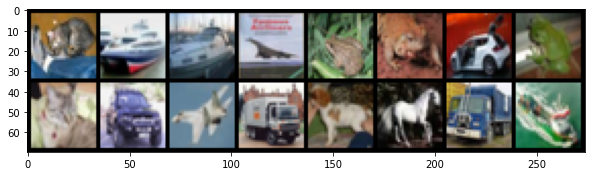

Reconstructed image


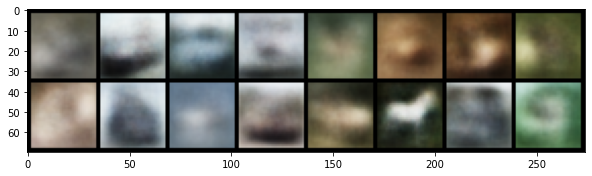

In [94]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
imshow(torchvision.utils.make_grid(images))

images = Variable(images).data.cuda()

print("Reconstructed image")
decoded_imgs = autoencoder(images)[1]
# decoded_imgs=decoded_imgs.to("cpu")
imshow(torchvision.utils.make_grid(decoded_imgs.data.cpu()))

### **Autoencoders**: Fully Connected Layers + Convulational Layers

In [95]:
class Autoencoder_FCCL(nn.Module):
    def __init__(self):
        super(Autoencoder_FCCL, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(
            # Write your code here
            nn.Conv2d(3, 12, 4, stride=2, padding=0), #32-4+0/2 + 1 = 15
            nn.ReLU(),
            nn.Conv2d(12, 24, 3, stride=2, padding=0),  #15-3+0/2 + 1 = 7
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(7*7*24, 3*3*6),
            nn.ReLU(),
            nn.Linear(3*3*6, 3*3),
        )
        self.decoder = nn.Sequential(
            # Write your code here
            nn.Linear(3*3, 3*3*6),
            nn.ReLU(),
            nn.Linear(3*3*6, 7*7*24),
            nn.ReLU(),
            nn.Unflatten(1, (24, 7, 7)),
            nn.ConvTranspose2d(24, 12, 3, stride=2, padding=0),
            nn.ReLU(),
            nn.ConvTranspose2d(12, 3, 4, stride=2, padding=0),
            nn.Sigmoid()
        )
    def forward(self, x): 
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)    
        return encoded, decoded


In [96]:
def print_model(encoder, decoder):
    print("############## Encoder ##############")
    print(encoder)
    print("############## Decoder ##############")
    print(decoder)
    print("")

def create_model_FCCL():
  autoencoder = Autoencoder_FCCL().cuda()
  print_model(autoencoder.encoder, autoencoder.decoder)
  return autoencoder

### Loss and Optimizer

In [97]:
autoencoder = create_model_FCCL()
# autoencoder = autoencoder.to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters())

############## Encoder ##############
Sequential(
  (0): Conv2d(3, 12, kernel_size=(4, 4), stride=(2, 2))
  (1): ReLU()
  (2): Conv2d(12, 24, kernel_size=(3, 3), stride=(2, 2))
  (3): ReLU()
  (4): Flatten(start_dim=1, end_dim=-1)
  (5): Linear(in_features=1176, out_features=54, bias=True)
  (6): ReLU()
  (7): Linear(in_features=54, out_features=9, bias=True)
)
############## Decoder ##############
Sequential(
  (0): Linear(in_features=9, out_features=54, bias=True)
  (1): ReLU()
  (2): Linear(in_features=54, out_features=1176, bias=True)
  (3): ReLU()
  (4): Unflatten(dim=1, unflattened_size=(24, 7, 7))
  (5): ConvTranspose2d(24, 12, kernel_size=(3, 3), stride=(2, 2))
  (6): ReLU()
  (7): ConvTranspose2d(12, 3, kernel_size=(4, 4), stride=(2, 2))
  (8): Sigmoid()
)



### Training

In [98]:
for epoch in range(10):
	running_loss = 0.0
	for i, (inputs, _) in enumerate(trainloader, 0):
			# inputs = Variable(inputs).to(device)
			inputs = Variable(inputs).data.cuda()
	
			# ============ Forward ============
			encoded, outputs = autoencoder(inputs)
			loss = criterion(outputs, inputs)
			# ============ Backward ============
			optimizer.zero_grad()
			loss.backward()
			optimizer.step()
	
			# ============ Logging ============
			running_loss += loss.data
			if i % 2000 == 1999:
				print('[%d, %5d] loss: %.3f' %
					(epoch + 1, i + 1, running_loss / 2000))
				running_loss = 0.0
	
print('Finished Training')
print('Saving Model...')
torch.save(autoencoder.state_dict(), "autoencoder.pt")

[1,  2000] loss: 0.030
[2,  2000] loss: 0.023
[3,  2000] loss: 0.022
[4,  2000] loss: 0.022
[5,  2000] loss: 0.022
[6,  2000] loss: 0.022
[7,  2000] loss: 0.022
[8,  2000] loss: 0.022
[9,  2000] loss: 0.022
[10,  2000] loss: 0.022
Finished Training
Saving Model...


### Load the saved model and Reconstruct the image

In [99]:
autoencoder.load_state_dict(torch.load("/content/autoencoder.pt"))

<All keys matched successfully>

#### Provide Qualitative Results and Aanlysis with different encoder and decoder architectures as mentioned above.

GroundTruth:    cat  ship  ship plane  frog


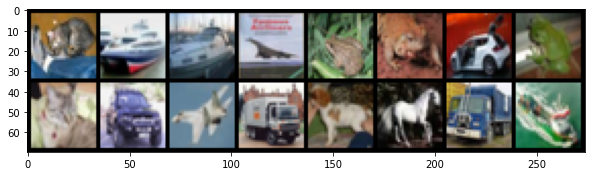

Reconstructed image


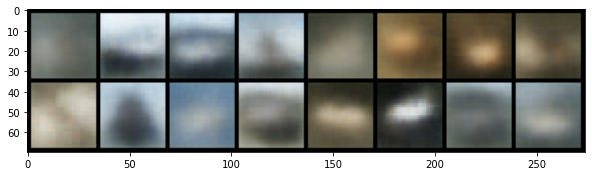

In [100]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
imshow(torchvision.utils.make_grid(images))

images = Variable(images).data.cuda()

print("Reconstructed image")
decoded_imgs = autoencoder(images)[1]
# decoded_imgs=decoded_imgs.to("cpu")
imshow(torchvision.utils.make_grid(decoded_imgs.data.cpu()))

### **Autoencoders**: Fully Convulational Layers

In [101]:
class Autoencoder_CLCL(nn.Module):
    def __init__(self):
        super(Autoencoder_CLCL, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(
            # Write your code here
            nn.Conv2d(3, 12, 4, stride=2, padding=0), 
            nn.ReLU(),
            nn.Conv2d(12, 24, 3, stride=2, padding=0),
            # nn.ReLU(),
            # nn.Conv2d(24, 1, 3, stride=2, padding=0),
            nn.Sigmoid()
        )
        self.decoder = nn.Sequential(
            # Write your code here
            # nn.ConvTranspose2d(1, 24, 3, stride=2, padding=0),
            # nn.ReLU(),
            nn.ConvTranspose2d(24, 12, 3, stride=2, padding=0),
            nn.ReLU(),
            nn.ConvTranspose2d(12, 3, 4, stride=2, padding=0),
            nn.Sigmoid(),
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


In [102]:
def print_model(encoder, decoder):
    print("############## Encoder ##############")
    print(encoder)
    print("############## Decoder ##############")
    print(decoder)
    print("")

def create_model_CLCL():
  autoencoder = Autoencoder_CLCL().cuda()
  print_model(autoencoder.encoder, autoencoder.decoder)
  return autoencoder

### Loss and Optimizer

In [103]:
autoencoder = create_model_CLCL()
# autoencoder = autoencoder.to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters())

############## Encoder ##############
Sequential(
  (0): Conv2d(3, 12, kernel_size=(4, 4), stride=(2, 2))
  (1): ReLU()
  (2): Conv2d(12, 24, kernel_size=(3, 3), stride=(2, 2))
  (3): Sigmoid()
)
############## Decoder ##############
Sequential(
  (0): ConvTranspose2d(24, 12, kernel_size=(3, 3), stride=(2, 2))
  (1): ReLU()
  (2): ConvTranspose2d(12, 3, kernel_size=(4, 4), stride=(2, 2))
  (3): Sigmoid()
)



### Training

In [104]:
for epoch in range(10):
	running_loss = 0.0
	for i, (inputs, _) in enumerate(trainloader, 0):
			# inputs = Variable(inputs).to(device)
			inputs = Variable(inputs).data.cuda()
	
			# ============ Forward ============
			encoded, outputs = autoencoder(inputs)
			loss = criterion(outputs, inputs)
			# ============ Backward ============
			optimizer.zero_grad()
			loss.backward()
			optimizer.step()
	
			# ============ Logging ============
			running_loss += loss.data
			if i % 2000 == 1999:
				print('[%d, %5d] loss: %.3f' %
					(epoch + 1, i + 1, running_loss / 2000))
				running_loss = 0.0
	
print('Finished Training')
print('Saving Model...')
torch.save(autoencoder.state_dict(), "autoencoder.pt")

[1,  2000] loss: 0.014
[2,  2000] loss: 0.005
[3,  2000] loss: 0.004
[4,  2000] loss: 0.003
[5,  2000] loss: 0.003
[6,  2000] loss: 0.003
[7,  2000] loss: 0.003
[8,  2000] loss: 0.003
[9,  2000] loss: 0.002
[10,  2000] loss: 0.002
Finished Training
Saving Model...


### Load the saved model and Reconstruct the image

In [105]:
autoencoder.load_state_dict(torch.load("/content/autoencoder.pt"))

<All keys matched successfully>

#### Provide Qualitative Results and Aanlysis with different encoder and decoder architectures as mentioned above.

GroundTruth:    cat  ship  ship plane  frog


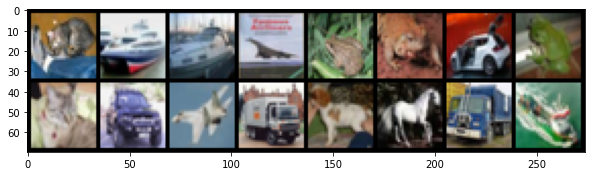

Reconstructed image


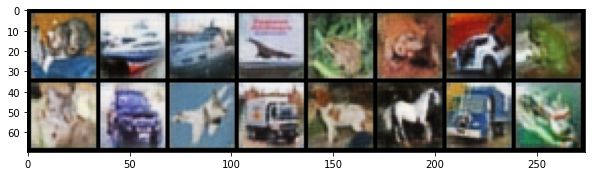

In [106]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
imshow(torchvision.utils.make_grid(images))

images = Variable(images).data.cuda()

print("Reconstructed image")
decoded_imgs = autoencoder(images)[1]
# decoded_imgs=decoded_imgs.to("cpu")
imshow(torchvision.utils.make_grid(decoded_imgs.data.cpu()))

### 2.1 What are the Applications of Autoencoders and different types of Autoencoders

Applications of Autoencoders

1. Dimensionality Reduction.
2. Image Compression.
3. Image Denoising.
4. Feature Extraction.
5. Image generation.
6. Sequence to sequence prediction.
7. Recommendation system.

Type of Autoencodes:

1. Denoising autoencoder.
2. Sparse Autoencoder.
3. Deep Autoencoder.
4. Contractive Autoencoder.
5. Undercomplete Autoencoder.
6. Convolutional Autoencoder.
7. Variational Autoencoder.

####2.2 PCA versus Autoencoders. Give detailed differences between them. (can use equations in latex and figures for the justification).

The differences between PCA and autoencoder are as follows: 
- A single layer autoencoder with a linear activation function is very close to PCA. 
- PCA is essentially a linear transformation, but autoencoders can represent complex nonlinear functions. 
- The PCA feature is completely linearly uncorrelated because it is a projection onto an orthogonal basis. Automatically encoded features, on the other hand,  are  trained only for accurate reconstruction and may show correlation. 
- Due to the large number of parameters, autoencoders tend to overfit. (However, this can be avoided by regularization and good planning.) 
- Autoencoders are slower and more expensive  than PCA.